In [75]:
import pandas as pd
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
df = pd.read_csv('./soc_cap_ready.csv')
df

,high_school_id,bias_own_ses_hs,volunteering_rate_hs,clustering_hs,school_size,race_range,grade_range,pupil_teacher_ratio,school_type_technical,agency_other,supp_virtual
0,10000500871,-0.02854,0.02939,0.38067,1436,55.96,3,20.09,0,0,0
1,10000600878,-0.14404,0.02863,0.45924,591,53.71,3,19.67,0,0,0
2,10000600883,-0.04785,0.03034,0.50861,449,91.12,3,16.79,0,0,0
3,10000601585,-0.06796,0.03058,0.51760,359,87.88,6,18.13,0,0,0
4,10000700251,0.01814,0.05033,0.42956,2891,52.05,3,15.70,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12738,560569500360,0.07885,0.05139,0.42955,944,87.37,3,16.25,0,0,0
12739,560576200324,-0.02163,0.05230,0.47649,792,81.82,3,15.86,0,0,0
12740,560583000335,0.14773,0.13192,0.46633,679,58.52,3,13.43,0,0,0
12741,560609000401,-0.11041,0.09728,0.69038,78,94.52,3,6.41,0,0,0


In [94]:
# We'll exclude binary variables (which typically have values 0 or 1)
# Identifying binary variables (assuming binary variables don't have values other than 0 or 1)
binary_columns = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
continuous_columns = df.columns.difference(binary_columns)

# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the scaler to the continuous variables and transforming them
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# Display result
df

,high_school_id,bias_own_ses_hs,volunteering_rate_hs,clustering_hs,school_size,race_range,grade_range,pupil_teacher_ratio,school_type_technical,agency_other,supp_virtual
0,-1.828050,-0.562031,-0.915159,-0.915346,0.563184,-0.781927,-0.402472,0.699333,0,0,0
1,-1.828049,-2.481527,-0.943820,-0.163548,-0.525612,-0.899005,-0.402472,0.628759,0,0,0
2,-1.828049,-0.882944,-0.879332,0.308850,-0.708581,1.047608,-0.402472,0.144817,0,0,0
3,-1.828049,-1.217152,-0.870280,0.394871,-0.824548,0.879016,3.087235,0.369984,0,0,0
4,-1.828048,0.213745,-0.125454,-0.447541,2.437975,-0.985382,-0.402472,-0.038341,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12738,1.729624,1.222686,-0.085478,-0.447637,-0.070766,0.852479,-0.402472,0.054078,0,0,0
12739,1.729667,-0.447193,-0.051160,0.001509,-0.266620,0.563687,-0.402472,-0.011455,0,0,0
12740,1.729711,2.367404,2.951528,-0.095707,-0.412223,-0.648719,-0.402472,-0.419781,0,0,0
12741,1.729879,-1.922630,1.645159,2.048120,-1.186621,1.224526,-0.402472,-1.599388,0,0,0


In [95]:
df.columns

Index(['high_school_id', 'bias_own_ses_hs', 'volunteering_rate_hs',
       'clustering_hs', 'school_size', 'race_range', 'grade_range',
       'pupil_teacher_ratio', 'school_type_technical', 'agency_other',
       'supp_virtual'],
      dtype='object')

In [96]:
target = 'bias_own_ses_hs'

variables = [target,'volunteering_rate_hs', 'school_size',
       'clustering_hs', 'race_range', 'grade_range', 'pupil_teacher_ratio',
       'school_type_technical', 'agency_other', 'supp_virtual']
df = df[variables]
df.columns

Index(['bias_own_ses_hs', 'volunteering_rate_hs', 'school_size',
       'clustering_hs', 'race_range', 'grade_range', 'pupil_teacher_ratio',
       'school_type_technical', 'agency_other', 'supp_virtual'],
      dtype='object')

In [97]:
# Splitting the dataframe into train and test sets
X, X_test = train_test_split(df, test_size=0.30, random_state=42)  # 30% of the data goes into the test set

# Checking the size of each split
X.shape, X_test.shape

((8920, 10), (3823, 10))

### LINEARITY ###

In [98]:
y = df[target]

# Adding a constant to the independent variables for intercept
X = df.drop(target, axis=1)
X = sm.add_constant(X)

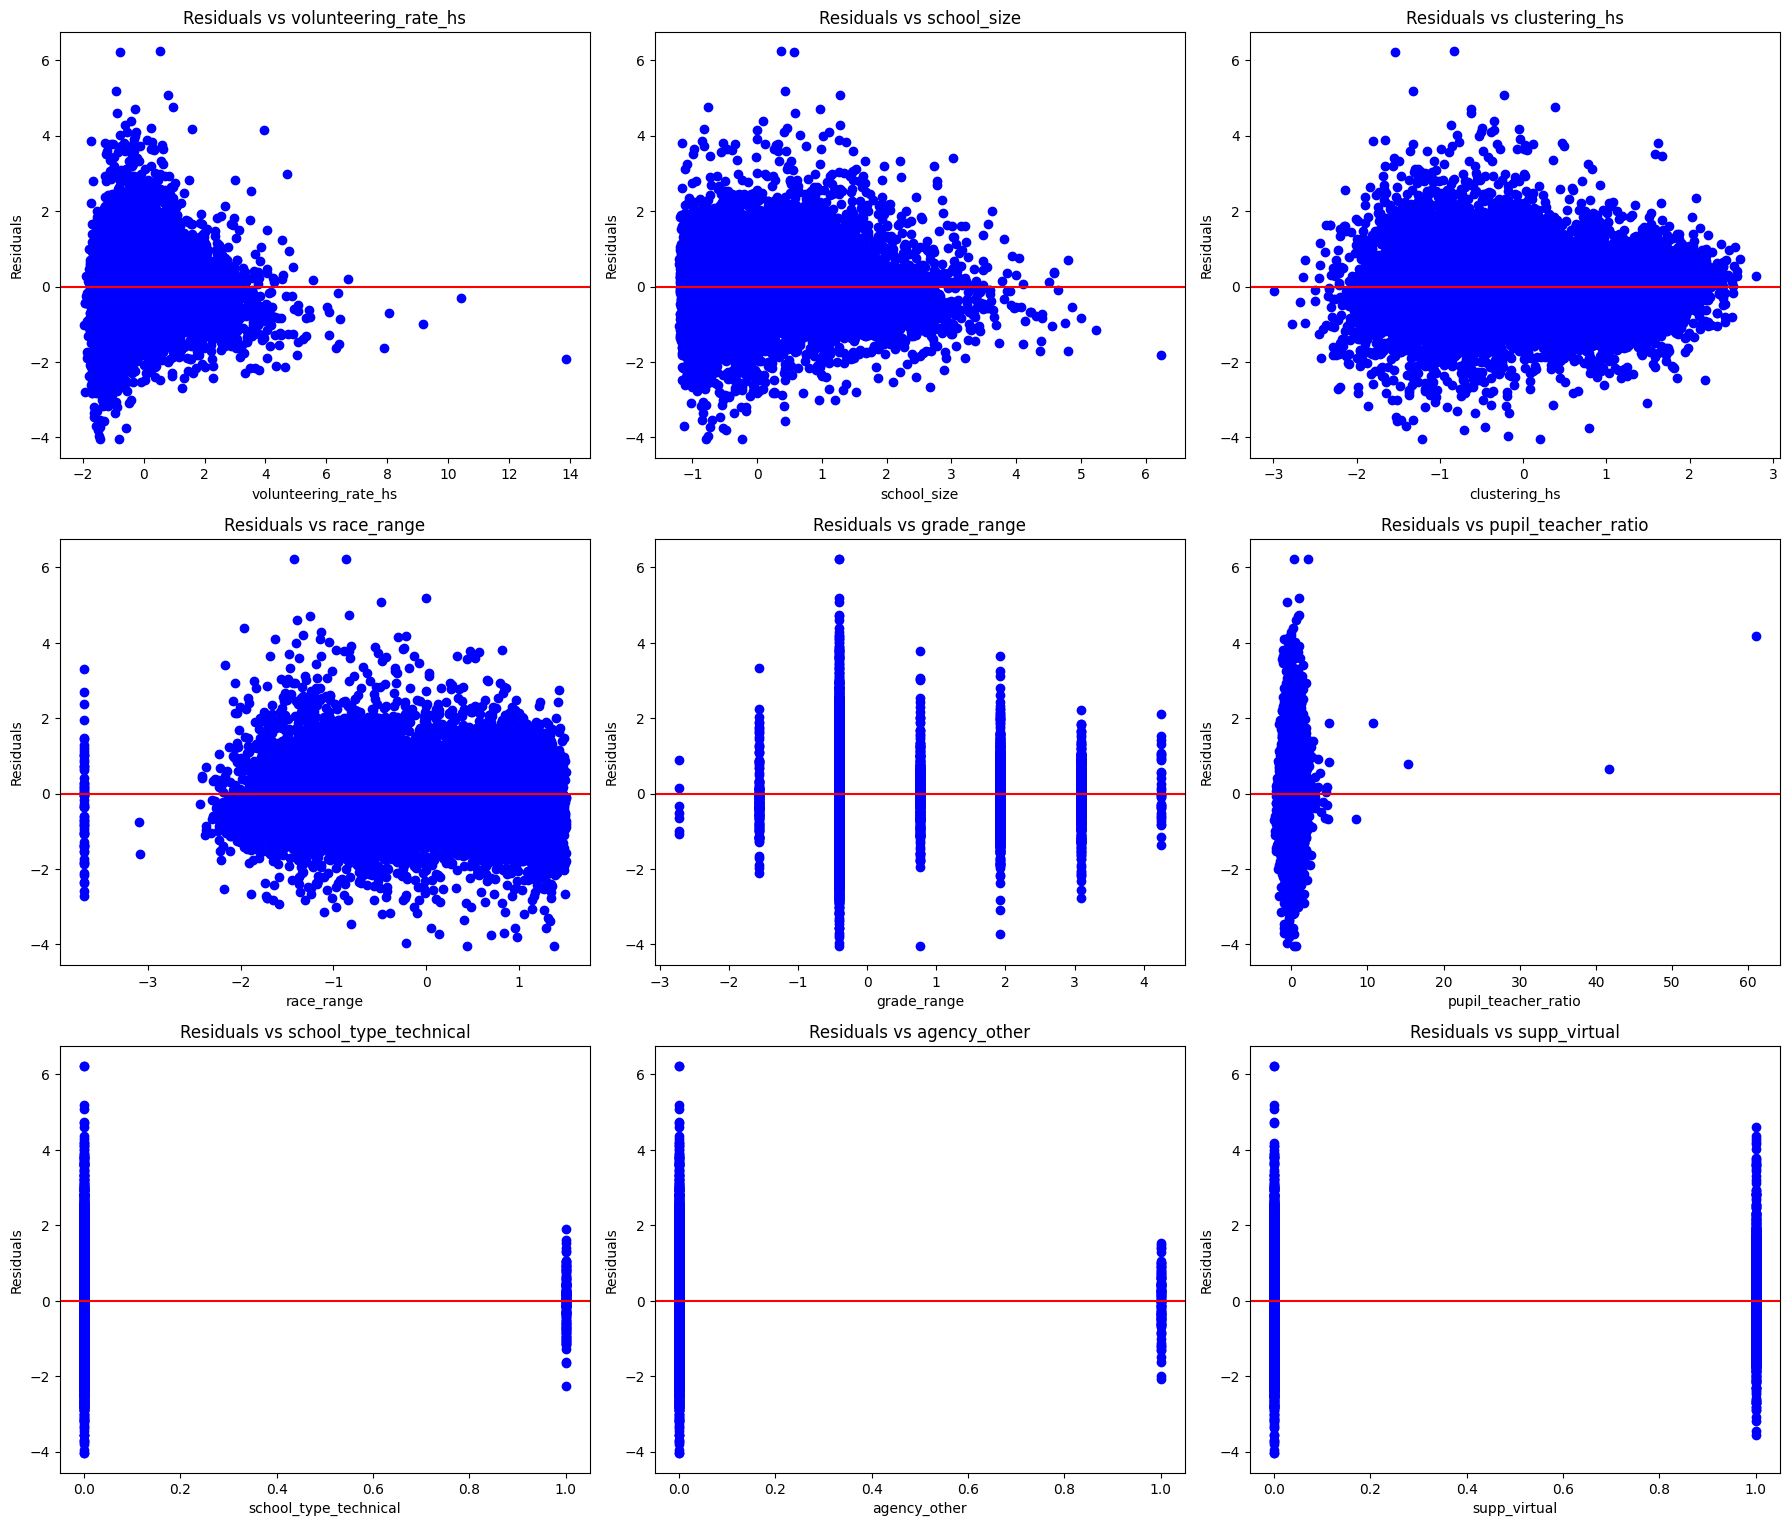

In [91]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Calculating residuals
residuals = model.resid

# Number of columns for subplots
num_cols = 3
num_rows = (len(X.columns) - 1) // num_cols + 1

# Creating subplots for Residuals vs. Predictors
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axs = axs.flatten()  # To iterate over them as a 1-d array

# Looping over predictors to create residual plots
for index, predictor in enumerate(X.columns[1:]):  # Skipping the constant
    axs[index].scatter(X[predictor], residuals, color='blue')
    axs[index].axhline(y=0, color='red', linestyle='-')
    axs[index].set_xlabel(predictor)
    axs[index].set_ylabel('Residuals')
    axs[index].set_title(f'Residuals vs {predictor}')

# If there are subplots that are not used, hide them
for index in range(len(X.columns) - 1, num_rows * num_cols):
    fig.delaxes(axs[index])

fig.tight_layout()
plt.show()


In [100]:
# reset dataset
df = pd.read_csv('./soc_cap_ready.csv')
df = df[variables]

# Correcting the mistake by importing numpy and applying log transformation again
df['log_school_size'] = np.log(df['school_size'])#.apply(lambda x: np.log(x) if x > 0 else None)
df['log_volunteering_rate_hs'] = np.log(df['volunteering_rate_hs']) #.apply(lambda x: np.log(x) if x > 0 else None)

In [101]:
# We'll exclude binary variables (which typically have values 0 or 1)
# Identifying binary variables (assuming binary variables don't have values other than 0 or 1)
binary_columns = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
continuous_columns = df.columns.difference(binary_columns)

In [102]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the scaler to the continuous variables and transforming them
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# Prepare the features (predictors) and the target variable
df = df.drop(columns=['school_size', 'volunteering_rate_hs'])


In [103]:
df.columns

Index(['bias_own_ses_hs', 'clustering_hs', 'race_range', 'grade_range',
       'pupil_teacher_ratio', 'school_type_technical', 'agency_other',
       'supp_virtual', 'log_school_size', 'log_volunteering_rate_hs'],
      dtype='object')

In [104]:
y = df[target]
X = df.drop(target,axis=1)

In [105]:
# Splitting the dataframe into train and test sets
X, X_test = train_test_split(X, test_size=0.30, random_state=42)  # 30% of the data goes into the test set
y, y_test = train_test_split(y, test_size=0.30, random_state=42)

# Checking the size of each split
X.shape, X_test.shape
X = sm.add_constant(X)

In [106]:
X.columns

Index(['const', 'clustering_hs', 'race_range', 'grade_range',
       'pupil_teacher_ratio', 'school_type_technical', 'agency_other',
       'supp_virtual', 'log_school_size', 'log_volunteering_rate_hs'],
      dtype='object')

In [107]:
y

6431     2.249741
11777   -0.304103
5576     0.359660
8292    -0.452844
7768     1.317082
           ...   
11964   -0.064457
5191    -0.204556
5390    -0.649114
860     -1.502335
7270     0.328915
Name: bias_own_ses_hs, Length: 8920, dtype: float64

In [108]:
y.shape

(8920,)

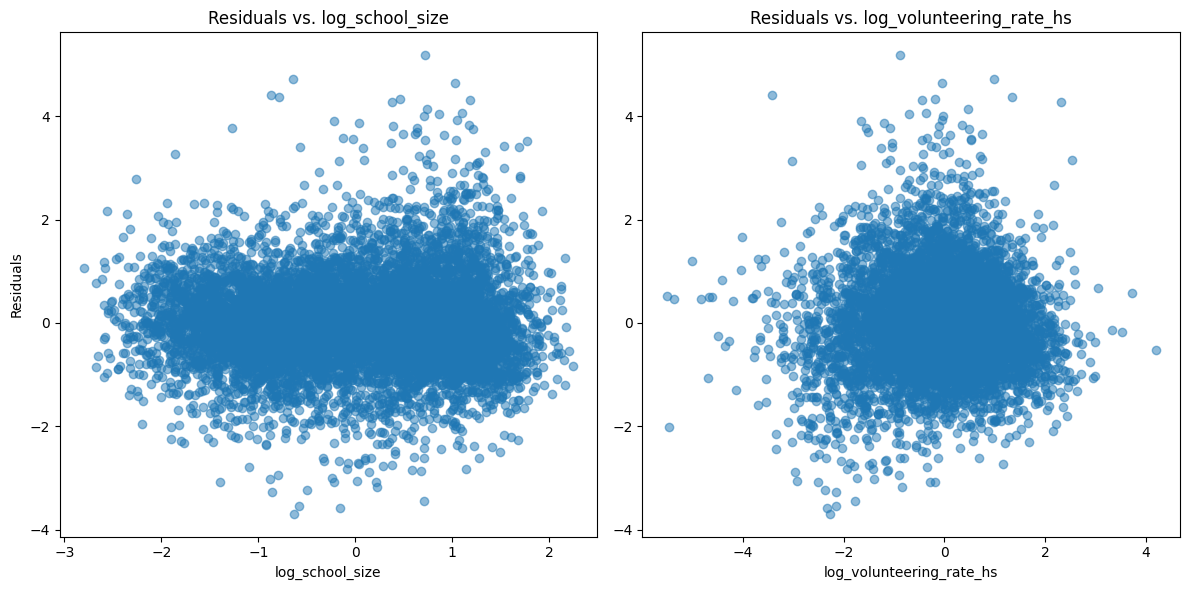

In [109]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Calculating residuals
residuals = model.resid

# Plotting residuals vs. predictors
plt.figure(figsize=(12, 6))

# Residuals vs. log_school_size
plt.subplot(1, 2, 1)
plt.scatter(X['log_school_size'], residuals, alpha=0.5)
plt.title('Residuals vs. log_school_size')
plt.xlabel('log_school_size')
plt.ylabel('Residuals')

# Residuals vs. log_volunteering_rate_hs
plt.subplot(1, 2, 2)
plt.scatter(X['log_volunteering_rate_hs'], residuals, alpha=0.5)
plt.title('Residuals vs. log_volunteering_rate_hs')
plt.xlabel('log_volunteering_rate_hs')

plt.tight_layout()
plt.show()


In [145]:
# sns.pairplot(df[continuous_columns])
# plt.show()

### MULTICOLLINARITY ###

In [110]:
# CHECK FOR MULTICOLLINARITY:

# first, drop the constant in X. it will just mess things up.
X = X.drop('const', axis = 1)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the variables with high VIF scores
high_vif = vif_data.sort_values(by="VIF", ascending=False).head()
high_vif

,variable,VIF
0,clustering_hs,4.756944
7,log_school_size,4.711833
2,grade_range,1.221559
1,race_range,1.214481
8,log_volunteering_rate_hs,1.163399


In [111]:
# Calculating the average VIF for the remaining variables, excluding 'const'
average_vif = vif_data['VIF'].mean()

average_vif

1.939465906253093

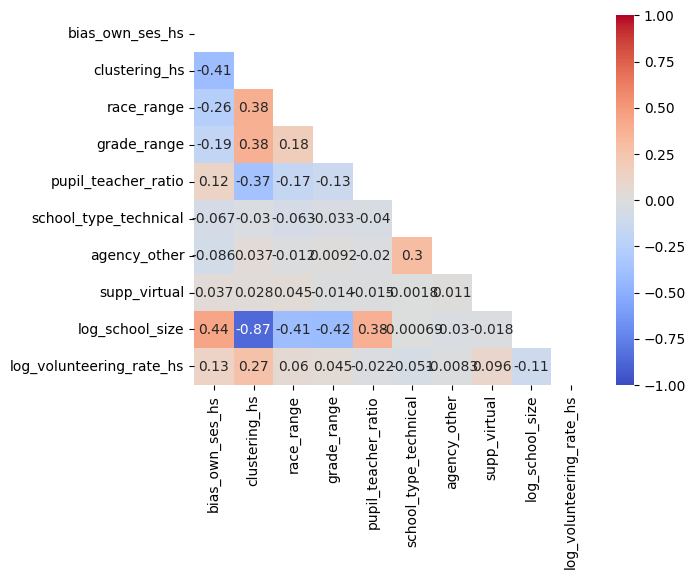

In [115]:
# Option 1: color-coded
sns.heatmap(df.corr(), 
            cmap = 'coolwarm',  # color pallete
            annot = True,  # adds the correlation values in the boxes
            vmin = -1,  # start color legend at -1
            vmax = 1,  # stop color legend at 1
            mask = np.triu(df.corr()))  # remove the upper half of the plot
plt.show()

In [116]:
df = df.drop(columns='log_school_size')

In [117]:
y = df[target]
X = df.drop(target,axis=1)

In [118]:
X.columns

Index(['clustering_hs', 'race_range', 'grade_range', 'pupil_teacher_ratio',
       'school_type_technical', 'agency_other', 'supp_virtual',
       'log_volunteering_rate_hs'],
      dtype='object')

In [119]:
X

,clustering_hs,race_range,grade_range,pupil_teacher_ratio,school_type_technical,agency_other,supp_virtual,log_volunteering_rate_hs
0,-0.915346,-0.781927,-0.402472,0.699333,0,0,0,-0.918763
1,-0.163548,-0.899005,-0.402472,0.628759,0,0,0,-0.969012
2,0.308850,1.047608,-0.402472,0.144817,0,0,0,-0.857749
3,0.394871,0.879016,3.087235,0.369984,0,0,0,-0.842637
4,-0.447541,-0.985382,-0.402472,-0.038341,0,0,0,0.112984
...,...,...,...,...,...,...,...,...
12738,-0.447637,0.852479,-0.402472,0.054078,0,0,0,0.152958
12739,0.001509,0.563687,-0.402472,-0.011455,0,0,0,0.186623
12740,-0.095707,-0.648719,-0.402472,-0.419781,0,0,0,1.961094
12741,2.048120,1.224526,-0.402472,-1.599388,0,0,0,1.376887


In [120]:
y

0       -0.562031
1       -2.481527
2       -0.882944
3       -1.217152
4        0.213745
           ...   
12738    1.222686
12739   -0.447193
12740    2.367404
12741   -1.922630
12742   -0.284992
Name: bias_own_ses_hs, Length: 12743, dtype: float64

### VARIABLE SELECTION ###

In [121]:
# Create a list of possible alphas
potential_alphas = np.logspace(-4, 2, 500)
LASSOCV_model = LassoCV(alphas = potential_alphas, 
                        cv = 5, 
                        random_state = 12345, 
                        max_iter = 10000, 
                        fit_intercept = True)

# Fit the model
LASSOCV_model.fit(X, y)

# Get the list of alphas and corresponding MSEs
alphas = LASSOCV_model.alphas_
pmse_means = np.mean(LASSOCV_model.mse_path_, axis = 1)
pmse_std_error = np.std(LASSOCV_model.mse_path_, 
                        axis = 1,
                        ddof = 1) / np.sqrt(5)  # 5-fold CV

# Find the alpha that minimizes MSE
alpha_index_min = np.argmin(pmse_means)
alpha_min = alphas[alpha_index_min]

# Find the MSE that is one standard error away from the minimum MSE
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][0]
alpha_1se = alphas[alpha_index_1se]

print("Minimum alpha:", alpha_min)
print("One SE alpha:", alpha_1se)

Minimum alpha: 0.000657105754603627
One SE alpha: 0.11326825671361537


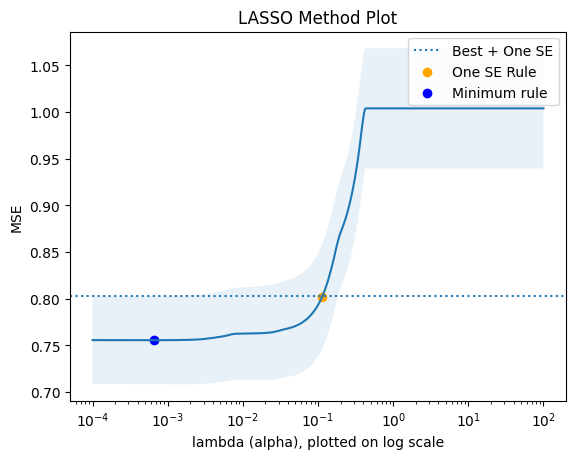

In [122]:
# Optional plot
plt.plot(alphas, 
         pmse_means)
plt.fill_between(alphas, 
                 pmse_means + pmse_std_error, 
                 pmse_means - pmse_std_error, 
                 alpha = 0.1)
plt.axhline(one_se_above_min, 
            linestyle = 'dotted', 
            label = 'Best + One SE')
plt.scatter([alpha_1se], 
            [pmse_means[alpha_index_1se]], 
            marker = 'o',
            color = 'orange', 
            label = 'One SE Rule')
plt.scatter([alpha_min],
            [pmse_means[alpha_index_min]],
            marker = 'o',
            color = 'blue',
            label = 'Minimum rule')
plt.legend()
plt.title('LASSO Method Plot')
plt.xscale('log')
plt.xlabel('lambda (alpha), plotted on log scale')
plt.ylabel('MSE')
plt.show()

In [123]:
# LASSO results with lambda within one SE of the mean
LASSO_1se = Lasso(alpha = alpha_1se,
                   fit_intercept = True)
LASSO_1se.fit(X, y)

print(list(zip(LASSO_1se.coef_, X)))

[(-0.3126748447337253, 'clustering_hs'), (-0.035648232179118666, 'race_range'), (-0.0, 'grade_range'), (0.0, 'pupil_teacher_ratio'), (-0.0, 'school_type_technical'), (-0.0, 'agency_other'), (0.0, 'supp_virtual'), (0.10031940854412198, 'log_volunteering_rate_hs')]


In [124]:
selected = {
    'lasso_val_abs': [],
    'lasso_val': [],
    'var_name': []
}

# Get coefficients
for var in list(zip(LASSO_1se.coef_, X)):
    if np.abs(var[0]) > 0.001:
        selected['lasso_val'].append(var[0])
        selected['lasso_val_abs'].append(np.abs(var[0]))
        selected['var_name'].append(var[1])
selected = pd.DataFrame(selected)
lasso_results = selected.sort_values(by='lasso_val_abs', ascending=False)
lasso_results

,lasso_val_abs,lasso_val,var_name
0,0.312675,-0.312675,clustering_hs
2,0.100319,0.100319,log_volunteering_rate_hs
1,0.035648,-0.035648,race_range


In [125]:
backward_selection = SFS(LinearRegression(fit_intercept = True), 
                         k_features = (1, len(X.columns)), 
                         forward = False, 
                         floating = False,
                         scoring = 'neg_mean_squared_error',
                         cv = 5)

backward = backward_selection.fit(X, y)

print('Backward Stepwise Selection:', backward.k_feature_names_)

Backward Stepwise Selection: ('clustering_hs', 'race_range', 'pupil_teacher_ratio', 'school_type_technical', 'agency_other', 'log_volunteering_rate_hs')


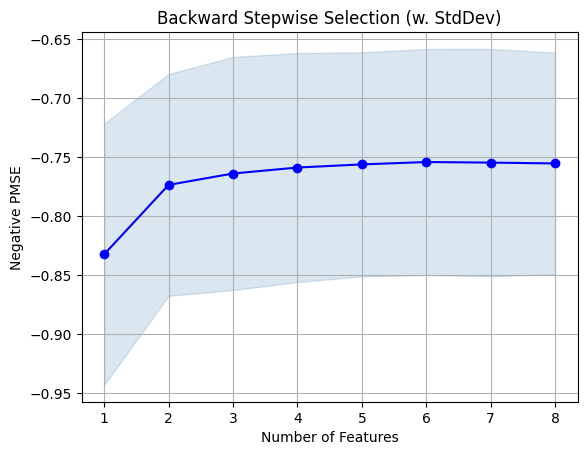

In [126]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(backward.get_metric_dict(), kind = 'std_dev')
plt.title('Backward Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [127]:
# Code to see the next best models
backward_results = pd.DataFrame.from_dict(backward.get_metric_dict()).T
backward_results_sorted = backward_results.sort_values(by = 'avg_score', ascending = False)
backward_results_sorted.head(20)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 1, 3, 4, 5, 7)","[-0.9050800250116107, -0.6860391250207035, -0....",-0.754355,"(clustering_hs, race_range, pupil_teacher_rati...",0.123064,0.095748,0.047874
7,"(0, 1, 2, 3, 4, 5, 7)","[-0.9046122675220072, -0.6854888040946101, -0....",-0.754836,"(clustering_hs, race_range, grade_range, pupil...",0.123734,0.096269,0.048135
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[-0.9035108505747715, -0.6839846892407325, -0....",-0.755541,"(clustering_hs, race_range, grade_range, pupil...",0.120674,0.093888,0.046944
5,"(0, 1, 3, 4, 7)","[-0.9028108753344403, -0.6877583116795438, -0....",-0.756353,"(clustering_hs, race_range, pupil_teacher_rati...",0.121925,0.094862,0.047431
4,"(0, 1, 4, 7)","[-0.9063939765440788, -0.6906274344196188, -0....",-0.759019,"(clustering_hs, race_range, school_type_techni...",0.124671,0.096998,0.048499
3,"(0, 1, 7)","[-0.9138279441467759, -0.6941145754618084, -0....",-0.764079,"(clustering_hs, race_range, log_volunteering_r...",0.126873,0.098712,0.049356
2,"(0, 7)","[-0.9215897956721474, -0.7068922469172402, -0....",-0.773715,"(clustering_hs, log_volunteering_rate_hs)",0.120721,0.093925,0.046963
1,"(0,)","[-1.0145362944747682, -0.7997174397336906, -0....",-0.832491,"(clustering_hs,)",0.142182,0.110622,0.055311


In [128]:
backward_results.at[3, 'feature_names']

('clustering_hs', 'race_range', 'log_volunteering_rate_hs')

In [129]:
df.columns

Index(['bias_own_ses_hs', 'clustering_hs', 'race_range', 'grade_range',
       'pupil_teacher_ratio', 'school_type_technical', 'agency_other',
       'supp_virtual', 'log_volunteering_rate_hs'],
      dtype='object')

In [130]:
df_small = df[[target,'clustering_hs','race_range','log_volunteering_rate_hs']]

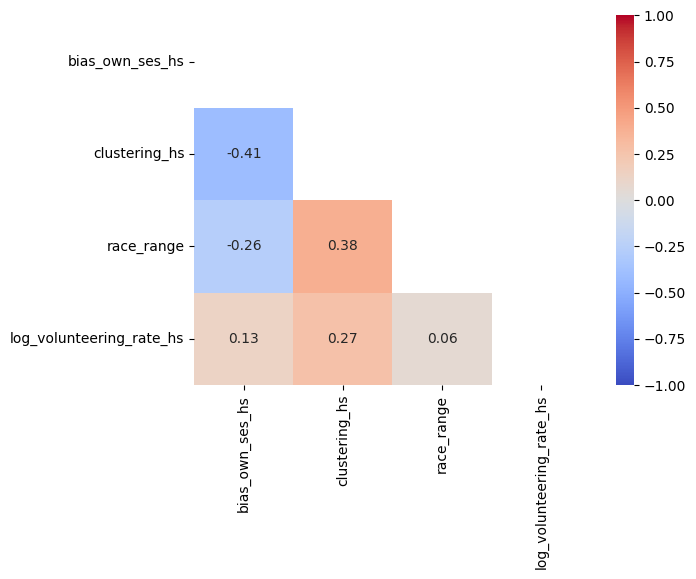

In [131]:
# Option 1: color-coded
sns.heatmap(df_small.corr(), 
            cmap = 'coolwarm',  # color pallete
            annot = True,  # adds the correlation values in the boxes
            vmin = -1,  # start color legend at -1
            vmax = 1,  # stop color legend at 1
            mask = np.triu(df_small.corr()))  # remove the upper half of the plot
plt.show()

In [132]:
# CHECK FOR MULTICOLLINARITY:

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["variable"] = df_small.columns
vif_data["VIF"] = [variance_inflation_factor(df_small.values, i) for i in range(df_small.shape[1])]

# Display the variables with high VIF scores
high_vif = vif_data.sort_values(by="VIF", ascending=False).head()
high_vif

,variable,VIF
1,clustering_hs,1.511952
0,bias_own_ses_hs,1.318978
2,race_range,1.190463
3,log_volunteering_rate_hs,1.161865


In [293]:
# # dropping 'log_students_9_to_12' because it doesn't have a very high correlation with our target, and looks like it is bringing in some multicollinearity.
# df_small = df_small.drop('log_students_9_to_12', axis=1)

In [54]:
# # Option 1: color-coded
# sns.heatmap(df_small.corr(), 
#             cmap = 'coolwarm',  # color pallete
#             annot = True,  # adds the correlation values in the boxes
#             vmin = -1,  # start color legend at -1
#             vmax = 1,  # stop color legend at 1
#             mask = np.triu(df_small.corr()))  # remove the upper half of the plot
# plt.show()

In [133]:
X = df_small.drop(target, axis=1)
X = sm.add_constant(X)
y = df_small[target]

In [134]:
# Splitting the dataframe into train and test sets
X, X_test = train_test_split(X, test_size=0.30, random_state=42)  # 30% of the data goes into the test set
y, y_test = train_test_split(y, test_size=0.30, random_state=42)

# Checking the size of each split
X.shape, X_test.shape
X = sm.add_constant(X)

### OUTLIERS AND NORMALITY ###

In [142]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Calculate the DFFITS values
influence = model.get_influence()
dffits, dffits_threshold = influence.dffits
dffits_threshold = dffits_threshold*2

# Plotting the DFFITS values (Optional)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dffits)), dffits, alpha=0.7)
plt.axhline(y=dffits_threshold, color='r', linestyle='--')
plt.axhline(y=-dffits_threshold, color='r', linestyle='--')
plt.title('DFFITS Plot')
plt.xlabel('Observation Index')
plt.ylabel('DFFITS Value')
plt.show()

# Identify and print the row numbers of extreme outliers
extreme_outliers = np.where(np.abs(dffits) > dffits_threshold)[0]

KeyboardInterrupt: 

In [ ]:
# Identify the row numbers and DFFITS values of extreme outliers
extreme_outliers_indices = np.where(np.abs(dffits) > dffits_threshold)[0]
extreme_outliers_values = dffits[extreme_outliers_indices]

# Combine indices and values into a list of tuples and sort by the absolute value of DFFITS
extreme_outliers_sorted = sorted(zip(extreme_outliers_indices, extreme_outliers_values), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted list of extreme outliers
print("Sorted extreme outliers (Row Number, DFFITS Value):")
for index, value in extreme_outliers_sorted:
    print(f"Row {index}: DFFITS = {value}")

In [137]:
# Drop rows with indices 8599, 6255, and 9383 from the DataFrame 'df'
df_small = df_small.drop([7893])

# Reset the index numbers, dropping the old index
df_small = df_small.reset_index(drop=True)

In [138]:
X = df_small.drop(target, axis=1)
X = sm.add_constant(X)
y = df_small[target]

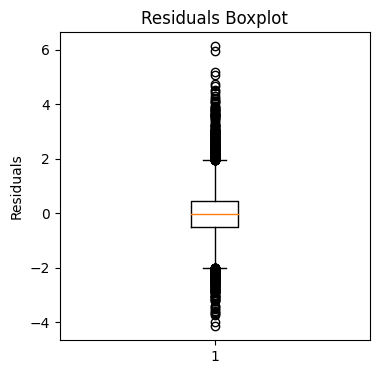

In [139]:
# Fit the linear regression model
model = sm.OLS(y, X)
res = model.fit()
residuals = res.resid

fig = plt.figure(figsize = (4, 4))
plt.boxplot(residuals)
plt.title("Residuals Boxplot")
plt.ylabel("Residuals")
plt.show()

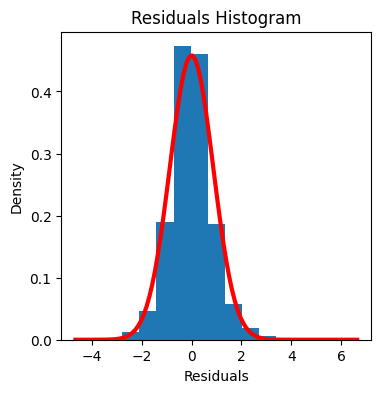

In [140]:
fig = plt.figure(figsize = (4, 4))

# plot histogram (density=True so that it's on the same scale as the normal distribution)
plt.hist(residuals, density = True, bins = 15)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(residuals)
sd = np.std(residuals)

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x, stats.norm.pdf(x, mean, sd), color = 'r', lw = 3)
plt.show()

### FINAL MODEL ###

In [141]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        bias_own_ses_hs   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     1355.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:08:44   Log-Likelihood:                -16316.
No. Observations:               12742   AIC:                         3.264e+04
Df Residuals:                   12738   BIC:                         3.267e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.026e-05      0.008     -0.012      0.991      -0.015       0.015
clustering_hs               -0.4376      0.009    -50.552      0.000      -0.455      -0.421
race_range                  -0.1102      0.008    -13.177      0.000      -0.127      -0.094
log_volunteering_rate_hs     0.2513      0.008     31.368      0.000       0.236       0.267
==============================================================================
Omnibus:                     1091.433   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3637.074
Skew:                           0.420   Prob(JB):                         0.00
Kurtosis:                       5.479   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# df_og = pd.read_csv('/Users/jasonharmon/Desktop/Python Projects/school_info/soc_cap_final.csv')
# df_og.columns

Index(['ec_own_ses_hs', 'ec_high_own_ses_hs', 'ec_parent_ses_hs',
       'ec_high_parent_ses_hs', 'exposure_own_ses_hs',
       'exposure_parent_ses_hs', 'bias_own_ses_hs', 'bias_high_own_ses_hs',
       'bias_parent_ses_hs', 'bias_high_parent_ses_hs', 'clustering_hs',
       'volunteering_rate_hs', 'students_9_to_12', 'race_range', 'grade_range',
       'pupil_teacher_ratio', 'type_alternative', 'type_technical',
       'agency_charter_specialized', 'agency_other', 'virtual', 'supp_virtual',
       'status_new'],
      dtype='object')